In [32]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('Twitter_Data.csv')

In [34]:
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [36]:
df.dropna(inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [38]:
df['clean_text'].unique()

array(['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
       'talk all the nonsense and continue all the drama will vote for modi ',
       'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
       ..., 'did you cover her interaction forum where she left ',
       'there big project came into india modi dream project but not happened reality',
       'have you ever listen about like gurukul where discipline are maintained even narendra modi rss only maintaining the culture indian more attack politics but someone attack hinduism rss will take action that proud for '],
      dtype=object)

In [39]:
df['clean_text'] = df['clean_text'].str.lower()

In [40]:
df['clean_text'].unique()

array(['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
       'talk all the nonsense and continue all the drama will vote for modi ',
       'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
       ..., 'did you cover her interaction forum where she left ',
       'there big project came into india modi dream project but not happened reality',
       'have you ever listen about like gurukul where discipline are maintained even narendra modi rss only maintaining the culture indian more attack politics but someone attack hinduism rss will take action that proud for '],
      dtype=object)

In [41]:
df['category'].unique()

array([-1.,  0.,  1.])

In [42]:
# Text Cleaning Function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\@\w+', '', text)    # Remove mentions
    text = re.sub(r'\#\w+', '', text)    # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.strip()  # Remove leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = text.replace('\n', ' ')  # Replace newlines with spaces
    text = text.replace('\t', ' ')  # Replace tabs with spaces
    text  = text.title()
    return text

# Applying the cleaning function
df['clean_text'] = df['clean_text'].apply(clean_text)

In [43]:
df.head(5)

,clean_text,category
0,When Modi Promised Minimum Government Maximum ...,-1.0
1,Talk All The Nonsense And Continue All The Dra...,0.0
2,What Did Just Say Vote For Modi Welcome Bjp To...,1.0
3,Asking His Supporters Prefix Chowkidar Their N...,1.0
4,Answer Who Among These The Most Powerful World...,1.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159373 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  159373 non-null  object 
 1   category    159373 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.6+ MB


In [47]:
df['category'] = df['category'].astype('int')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159373 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  159373 non-null  object
 1   category    159373 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [49]:
df.head()

,clean_text,category
0,When Modi Promised Minimum Government Maximum ...,-1
1,Talk All The Nonsense And Continue All The Dra...,0
2,What Did Just Say Vote For Modi Welcome Bjp To...,1
3,Asking His Supporters Prefix Chowkidar Their N...,1
4,Answer Who Among These The Most Powerful World...,1


In [50]:
# Sentimental Analysis

In [51]:
from wordcloud import WordCloud

In [52]:
positive_text = ' '.join(df[df['category'] == 1]['clean_text'])
negative_text = ' '.join(df[df['category'] == -1]['clean_text'])
neutral_text = ' '.join(df[df['category'] == 0]['clean_text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
wordcloud_neu = WordCloud(width=800, height=400, background_color='gray').generate(neutral_text)

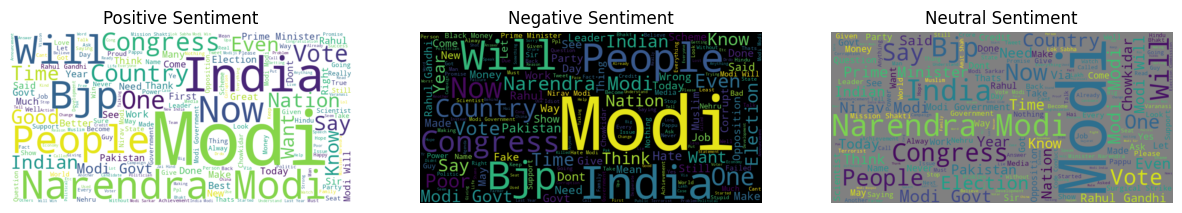

In [53]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.show()

In [54]:
# Feature Engineering

In [55]:
# Splitting Data
X = df['clean_text']
y = df['category']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [56]:
# Model Training

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.924235294117647
              precision    recall  f1-score   support

          -1       0.92      0.81      0.86      7002
           0       0.92      0.98      0.95     10812
           1       0.93      0.94      0.94     14061

    accuracy                           0.92     31875
   macro avg       0.92      0.91      0.91     31875
weighted avg       0.92      0.92      0.92     31875



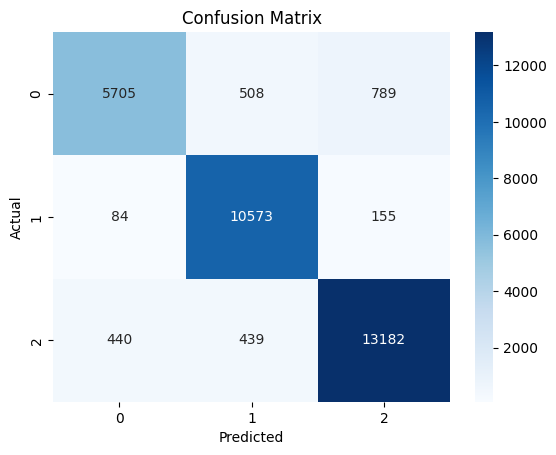

In [59]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [60]:
X_train

<127498x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2056755 stored elements in Compressed Sparse Row format>

In [61]:
X_test

<31875x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 511948 stored elements in Compressed Sparse Row format>